In [1]:
import sys, os, time
import numpy as np
#%matplotlib notebook
%matplotlib tk
import matplotlib.pyplot as plt

import foundation as fd
from foundation import util

from dm_control import suite
from dm_control import viewer

In [2]:
tasks = suite.ALL_TASKS
for i, t in enumerate(tasks):
    print(i,*t)

0 acrobot swingup
1 acrobot swingup_sparse
2 ball_in_cup catch
3 cartpole balance
4 cartpole balance_sparse
5 cartpole swingup
6 cartpole swingup_sparse
7 cartpole two_poles
8 cartpole three_poles
9 cheetah run
10 finger spin
11 finger turn_easy
12 finger turn_hard
13 fish upright
14 fish swim
15 hopper stand
16 hopper hop
17 humanoid stand
18 humanoid walk
19 humanoid run
20 humanoid run_pure_state
21 humanoid_CMU stand
22 humanoid_CMU run
23 lqr lqr_2_1
24 lqr lqr_6_2
25 manipulator bring_ball
26 manipulator bring_peg
27 manipulator insert_ball
28 manipulator insert_peg
29 pendulum swingup
30 point_mass easy
31 point_mass hard
32 reacher easy
33 reacher hard
34 stacker stack_2
35 stacker stack_4
36 swimmer swimmer6
37 swimmer swimmer15
38 walker stand
39 walker walk
40 walker run


In [5]:
task = tasks[5]
task

('cartpole', 'swingup')

In [6]:
#env = suite.load(domain_name="humanoid", task_name="stand")
env = suite.load(*task)
action_spec = env.action_spec()

# Define a uniform random policy.
def random_policy(time_step):
    del time_step  # Unused.
    return np.random.uniform(low=action_spec.minimum,
                           high=action_spec.maximum,
                           size=action_spec.shape)

# Launch the viewer application.
viewer.launch(env, policy=random_policy)

In [20]:
img = env.physics.render(240, 320, camera_id='fixed', segmentation=True)
img.shape

(240, 320, 2)

In [30]:
phys = env.physics

In [31]:
phys.model.geom_type

array([0, 3, 3, 6, 3])

In [32]:
phys.model.geom_type[3] = 3

In [33]:
N, M = 100, 100

plt.figure()
for i in range(N):
    env.reset()
    for j in range(M):
        action = random_policy(None)
        for _ in range(5):
            env.step(action)
        img = env.physics.render(240, 320, camera_id='fixed', segmentation=False)
        plt.cla()
        plt.imshow(img)
        plt.title('{}/{}'.format(j,M))
        plt.pause(0.001)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\anwan\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "C:\Users\anwan\Anaconda3\lib\tkinter\__init__.py", line 746, in callit
    func(*args)
  File "C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 310, in idle_draw
    self.draw()
  File "C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 12, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 437, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\artist.py", line 55, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "C:\Users\anwan\Anaconda3\lib\site-packages\matplotlib\figure.py", line 1493, in draw
    renderer, self, artists, self.suppressComposite)
  File "C:\Users

In [17]:
env.physics.model.vis.map_.znear

0.009999999776482582

In [52]:
rgb = env.physics.render(64, 64, camera_id='lookatcart')
rgb.shape

(64, 64, 3)

<IPython.core.display.Javascript object>


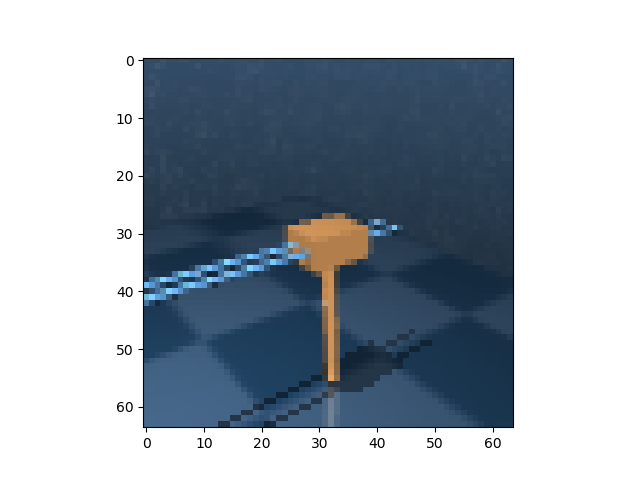

In [53]:
plt.imshow(rgb)

In [5]:
phys = env.physics

In [41]:
type(phys)

dm_control.suite.humanoid.Physics

In [9]:
phys.model.mat_rgba

array([[1. , 1. , 1. , 1. ],
       [0.7, 0.5, 0.3, 1. ],
       [0.7, 0.5, 0.3, 1. ],
       [0. , 0.5, 0.3, 1. ],
       [0.7, 0.4, 0.2, 1. ],
       [0.7, 0.4, 0.2, 1. ],
       [0. , 0.5, 0.3, 1. ],
       [0.3, 0.5, 0.7, 1. ],
       [0. , 0.2, 1. , 1. ],
       [0.6, 0.3, 0.3, 1. ],
       [0.6, 0.3, 0.3, 1. ],
       [0.6, 0.3, 0.3, 0.4]], dtype=float32)